# Video game sales with ratings


**We have chosen a data set from Kaggle, that can be found on the following link: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings **

**The data set that we will be using is in one file, Video_Games_Sales_as_at_22_Dec_2016.csv.**

## Goals

**In 20 years, the gaming industry has grown and sophisticated. By exploring this data set, we will be able to find trends about the industry, compare consoles against eachother, search through the most popular genres, compare the market in different regions in the world and find the differences etc.**

## Data 

**The data set consists of video games, information on their sales and ratings received by Metacritic<sup>1</sup> and ESRB<sup>2</sup>. The basic data and sales data are taken over by VG Chartz<sup>3</sup> and are then complemented by ratings from Metacritic and ESRB. Only games that are sold in more than 100000 copies are included.**

Attribute | Description      | Type | Value
----------|------------------|------|------
Name      | Name of the game | String | Discrete
Platform | Console on which the game is running | String | Discrete
Year_of_Release | Year of release | Numeric | Discrete
Genre | Genre |  String | Discrete
Publisher | Company that publishes the game | String | Discrete
NA_Sales | Game sales in North America in millions of units | Numeric | Continuous
EU_Sales | Game sales in Europe in millions of units | Numeric | Continuous
JP_Sales | Game sales in Japan in millions od units | Numeric | Continuous
Other_Sales | Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding EU and South America in millions of units | Numeric | Continuous
Global_Sales | Total sales in the world in millions of units <sup>4</sup> | Numeric | Continuous
Critic_Score | Aggregate score compiled by Metacritic staff | Numeric | Continuous
Critic_Count | The number of critics used in coming up with the critic score | Numeric | Discrete
User_Score | Score by Metacritic's subscribers | Numeric | Continuous
User_Count | Number of users who gave the user score | Numeric | Discrete 
Developer | Party responsible for creating the game | String | Discrete
Rating | The ESRB ratings (e.g.Everyone, Teen, Adults Only..etc.) | String | Discrete

## Pre-procesing the data

**Before we make a pre-processing, the set has 16719 samples. Once the samples are removed that have no values for some attributes (most often because Metacritic does not cover all platforms), there are approximately 6900 items. From these, we are discarding games for which we do not have a year of release, and finally, 6825 instances remain with all the attributes. We think that these are enough instances to work with. However, because of this we lose a large part of the games before 1999 (before Metacritic is formed), a small part of these games have all the attributes. Additionally, as seen in the graph for the year of production there are several years after the formation of Metacritic for which we do not have data at all. For these reasons, we kept the original set in case we need the data in the future work.**

## Univariate Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
vg_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
vg_cleaned = vg_df.dropna(axis=0, how='any')
vg_cleaned.User_Score = vg_cleaned.User_Score.convert_objects(convert_numeric=True)
vg_cleaned.loc[:,'Year_of_Release'] = vg_cleaned.loc[:,'Year_of_Release'].astype(int)

### Year of Release

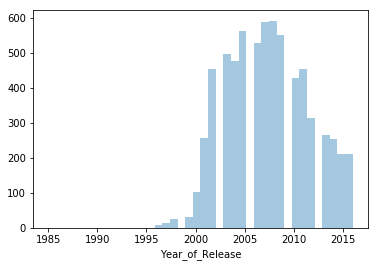

In [3]:
sns.distplot(vg_cleaned.Year_of_Release, kde=False, bins = 40);

**The holes in the histogram for the Year_of_Release indicates that for specific years we have no data due to pre-processing the data. An interesting trend is the increase in the number of produced games per year until 2009, after which this number begins to decrease. An interesting hypothesis that could be the subject of further research is that this trend is due to the economic crisis in 2009. The histogram shows that the data is negatively skewed. Additionally, we have a small number of outliers and a small number of games before 1999 because Metacritic was formed in 1999.**

### Sales

**The following five graphs refer to the attributes for total sales and sales in different regions of the world. Each of these graphs consists of three parts: histogram, box plot with outliers and box plot without outliers. In histograms and box plots with outliers we have a logarithmic scale in the y-axis, for a better view of the data. Box plot schedules without outliers have a linear scale on the y-axis and we have drawn them for a better overview of central tendency measures because some outliers deviate considerably from central tension measures and make the graph so vast. We can see that all data is positively skewed. This means that a small number of games are sold in huge quantities, while most games have significantly less sales. In general, the number of outliers is high, especially in Japan and countries that fall into Other_Sales. Another thing that can be noticed is that sales are the highest in North America. Next comes the European Union and Japan, and all other countries together have the smallest sales.**

**Global Sales**

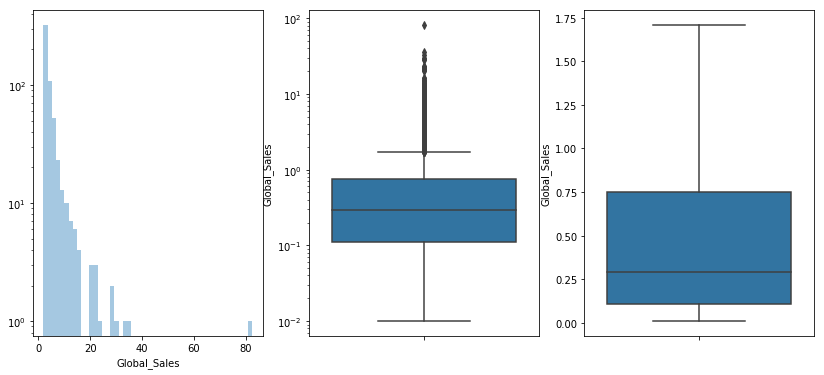

In [4]:
Global_Salesfig, axs = plt.subplots(ncols = 3, figsize=(14, 6))

first_plt = sns.distplot(vg_cleaned.Global_Sales[vg_cleaned.Global_Sales > 2], kde=False, ax=axs[0])
g = sns.boxplot(vg_cleaned.Global_Sales, ax=axs[1], orient = 'v')
sns.boxplot(vg_cleaned.Global_Sales, ax=axs[2], orient = 'v', showfliers=False)

first_plt.set_yscale('log')
g.set_yscale('log')

**North America**

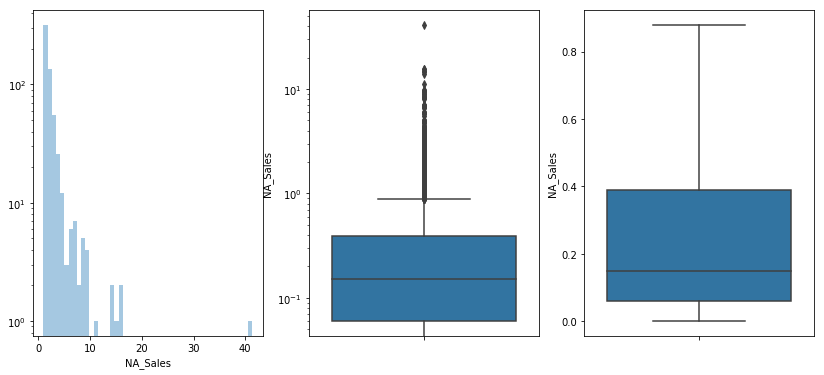

In [5]:
Global_Salesfig, axs = plt.subplots(ncols = 3, figsize=(14, 6))

first_plt = sns.distplot(vg_cleaned.NA_Sales[vg_cleaned.NA_Sales > 1], kde=False, ax=axs[0])
g = sns.boxplot(vg_cleaned.NA_Sales, ax=axs[1], orient = 'v')
sns.boxplot(vg_cleaned.NA_Sales, ax=axs[2], orient = 'v', showfliers=False)

first_plt.set_yscale('log')
g.set_yscale('log')

**European Union**

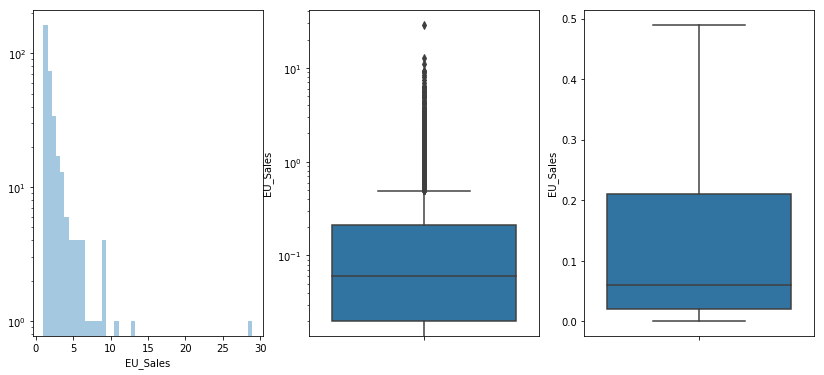

In [6]:
Global_Salesfig, axs = plt.subplots(ncols = 3, figsize=(14, 6))

first_plt = sns.distplot(vg_cleaned.EU_Sales[vg_cleaned.EU_Sales > 1], kde=False, ax=axs[0])
g = sns.boxplot(vg_cleaned.EU_Sales, ax=axs[1], orient = 'v')
sns.boxplot(vg_cleaned.EU_Sales, ax=axs[2], orient = 'v', showfliers=False)

first_plt.set_yscale('log')
g.set_yscale('log')

**Japan**

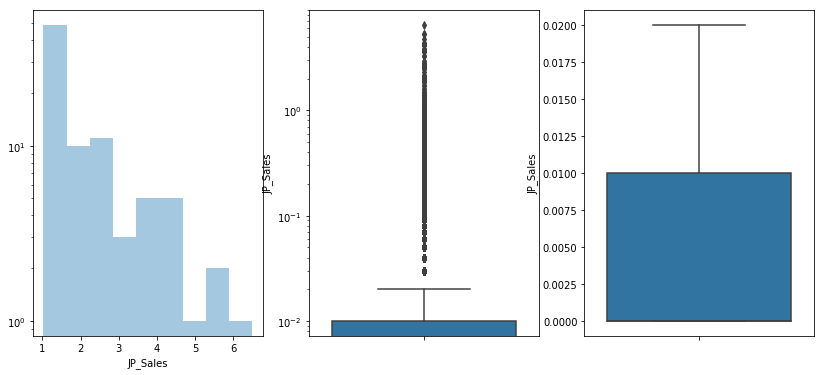

In [7]:
Global_Salesfig, axs = plt.subplots(ncols = 3, figsize=(14, 6))

first_plt = sns.distplot(vg_cleaned.JP_Sales[vg_cleaned.JP_Sales > 1], kde=False, ax=axs[0])
g = sns.boxplot(vg_cleaned.JP_Sales, ax=axs[1], orient = 'v')
sns.boxplot(vg_cleaned.JP_Sales, ax=axs[2], orient = 'v', showfliers=False)

first_plt.set_yscale('log')
g.set_yscale('log')

**Other Sales**

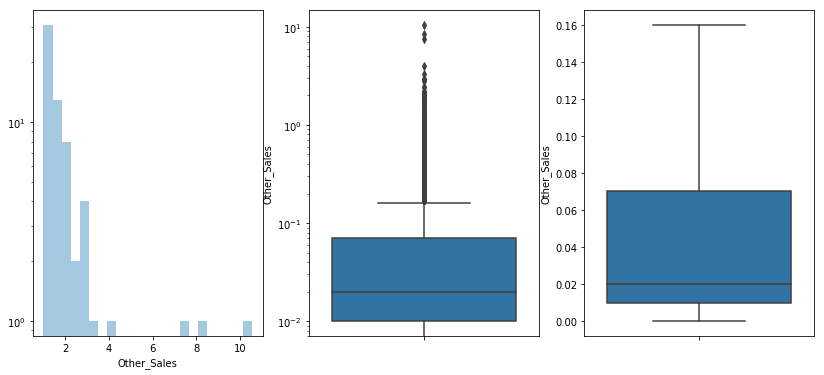

In [8]:
Global_Salesfig, axs = plt.subplots(ncols = 3, figsize=(14, 6))

first_plt = sns.distplot(vg_cleaned.Other_Sales[vg_cleaned.Other_Sales > 1], kde=False, ax=axs[0])
g = sns.boxplot(vg_cleaned.Other_Sales, ax=axs[1], orient = 'v')
sns.boxplot(vg_cleaned.Other_Sales, ax=axs[2], orient = 'v', showfliers=False)

first_plt.set_yscale('log')
g.set_yscale('log')

### Games Evaluation

**If we compare Critic_Score and User_Score, we can observe that the User_Score histogram is more negatively skewed than Critic_Score. This would mean that User_Score's mode is better centered than Critic_Score's, because subscribers tend to give higher scores, as expected, given the fact that critics are more objective in the assessment. We can also note that analysts and users, in general, give medium or high marks, which is a positive sign for the video game industry. The User_Count histogram is much more positively skewed than the one for Critic_Count.**

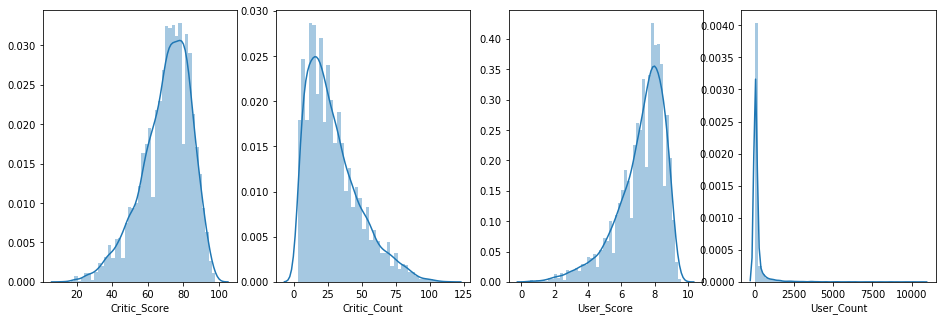

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(16,5))
sns.distplot(vg_cleaned.Critic_Score, ax=ax1)
sns.distplot(vg_cleaned.Critic_Count, ax=ax2)
sns.distplot(vg_cleaned.User_Score, ax=ax3)
sns.distplot(vg_cleaned.User_Count, ax=ax4)
plt.show()

### Categorical variables

**Developer**

** The global trend is that most of the games are made by small number of manufacturers, while a big number of manufacturers have made less than 10 games. This is consistent with the fact that there are several companies that produce a few games per year. On the other hand, there are a number of small independent companies that will produce several games before they are bought from a larger company or stop working. This chart shows the 40 most-released manufacturers. It's interesting to note that even four studios of Electronic Arts (EA) and 2 Ubisoft studios are in the top 15 manufacturers.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

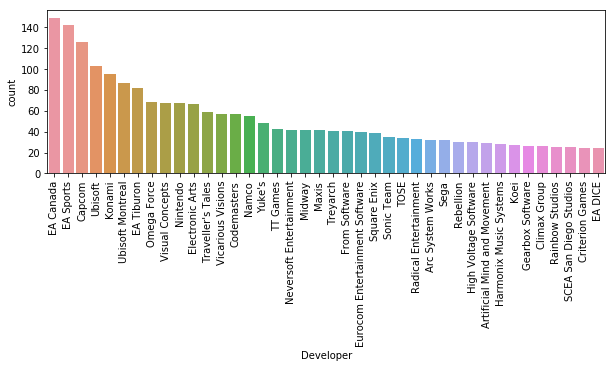

In [10]:
plt.figure(figsize=(10, 3))
sns.countplot(vg_cleaned.Developer, order = vg_cleaned.Developer.value_counts().iloc[:40].index)
plt.xticks(rotation=90)

**Publisher**

**We have the same case with the global trend about the publishers i.e a small number of publishers are releasing a large number of games, while many of the publishing companies have less than 15 games released. This is caused by the same reasons as the trend in the producers of games. This chart shows the 40 companies with the most issued games. It can be noted that most games have been released by Electronic Arts, which is expected given the fact that we saw on the manufacturers' charts that 4 of their studios are in the first 15 by number of produced games. The second company by the number of games released Ubisoft also has 2 studios in the first 15 by number of manufactured games. Additionally, other companies such as Nintendo, Capcom, etc. are among the top positions on both charts.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

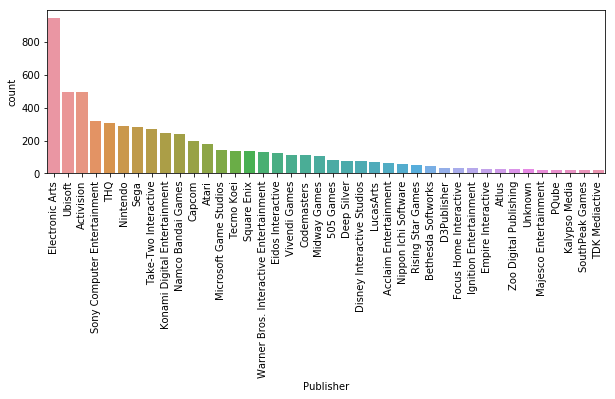

In [11]:
plt.figure(figsize=(10, 3))
sns.countplot(vg_cleaned.Publisher, order = vg_cleaned.Publisher.value_counts().iloc[:40].index)
plt.xticks(rotation=90)

## Correlation 

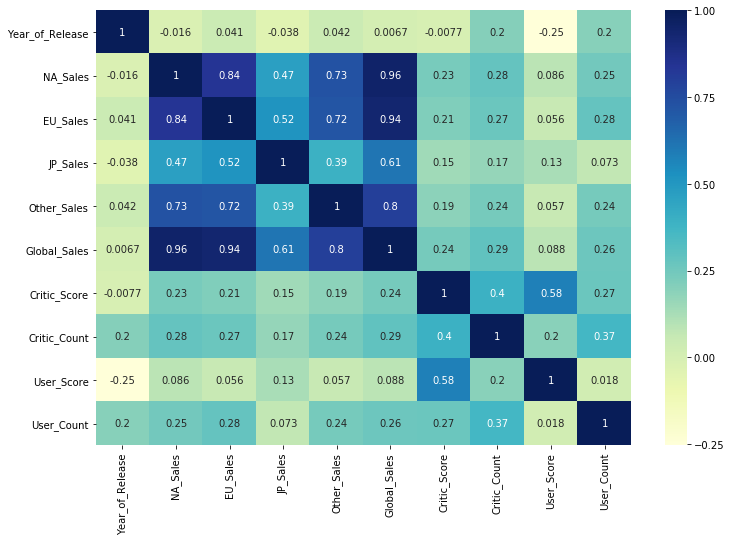

In [12]:
plt.figure(figsize=(12, 8))

vg_corr = vg_cleaned.corr();
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True,
           cmap="YlGnBu");
plt.figure(figsize=(12, 8))

**This chart shows a heat map with the values of the coefficient of correlation between pairs of different attributes. From this chart it can be clearly seen that there is a strong positive correlation between sales in different regions of the world, that is, as the number of sales in one region grows, the number of sales in another region is growing as well. This is expected because a game that is popular in one part of the world is probably also popular in another because of the global market. One interesting fact that can be seen from this graph is that sales in Japan are the least correlated with sales in the rest of the world. This means that the Japanese market is different from the global market and those games, that are popular in Japan, are less popular in the rest of the world. Additionally, sales in different regions are strongly correlated with the global sales as expected, given that global sales represent the sum of individual sales per region. Again, sales in Japan are poorly correlated with global sales, which further confirms the previously stated hypothesis.**

**The graph also shows a positive correlation between the user score and the one from the critics, which means that critics and users to some extent agree in the evaluation of video games. 
Additionally, we may notice a weaker positive correlation between the number of ratings and the score both for critics and for users, which means that a greater number of ratings in general case also means a higher rating for the games. **

**The strongest negative correlation is between the user score and the year of production. This means that newer games get worse ratings from users than older games. This is especially interesting given the fact that the year of production is almost uncorrelated with critics' score. One possible explanation of this trend is that users are nostalgic for older games and give them higher ratings. Another possible explanation is the saturation of the video games market and the non-inventiveness imposed by the race for faster production of video games at an almost annual level in the last 10 years.
In order to visualize some of these correlations, we will show a few scatter plots below.**


### Scatterplot between Global Sales and Regional Sales

** The following chart shows scatter plots between sales in each of the different regions and global sales, and again, sales in Japan have the smallest correlation with global sales. **

In [13]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_normalised_df = vg_cleaned[sales_cols].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

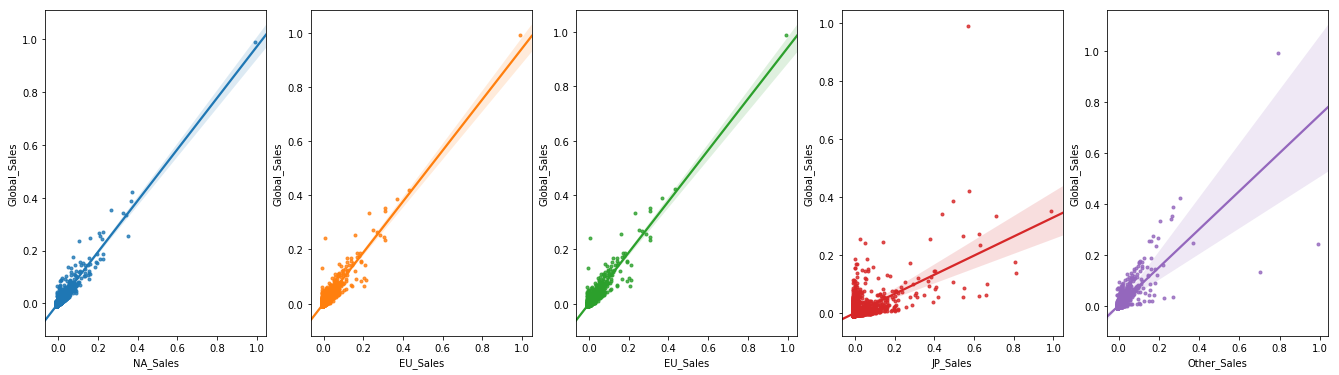

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(23,6))
sns.regplot(x = sales_normalised_df.NA_Sales, y = sales_normalised_df.Global_Sales, marker=".", ax=ax1)
sns.regplot(x = sales_normalised_df.EU_Sales, y = sales_normalised_df.Global_Sales, marker=".", ax=ax2)
sns.regplot(x = sales_normalised_df.EU_Sales, y = sales_normalised_df.Global_Sales, marker=".", ax=ax3)
sns.regplot(x = sales_normalised_df.JP_Sales, y = sales_normalised_df.Global_Sales, marker=".", ax=ax4)
sns.regplot(x = sales_normalised_df.Other_Sales, y = sales_normalised_df.Global_Sales, marker=".", ax=ax5)

### Regional Sales of Genres

In [15]:
color_dict = {
 'Action' : '#ff0000',
 'Sports' : '#1b6f1b',
 'Shooter' : '#ff6600',
 'Racing': '#49639a',
 'Misc': '#71642f',
 'Role-Playing': '#ffff00',
 'Platform': '#550f9d',
 'Fighting': '#660000',
 'Simulation': '#000d33',
 'Adventure': '#660066',
 'Puzzle': '#663d00',
 'Strategy': '#6b6b47',
}

In [16]:
ordered_genres_na = list(vg_cleaned.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).keys())
ordered_genres_eu = list(vg_cleaned.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).keys())
ordered_genres_os = list(vg_cleaned.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).keys())
ordered_genres_jp = list(vg_cleaned.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).keys())

(0, 600)

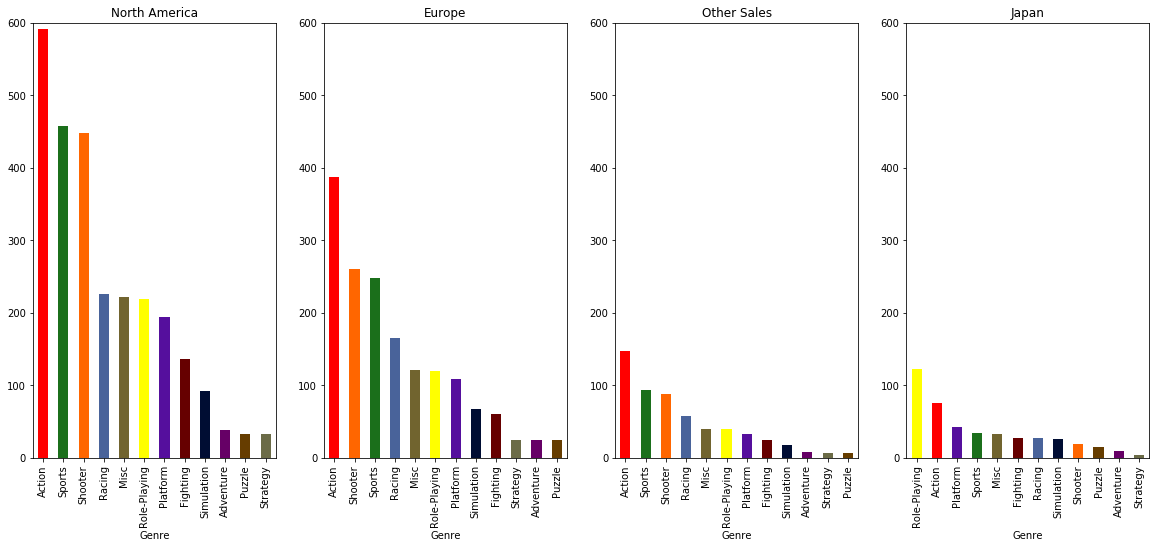

In [17]:
Regional_SalesFig, axs = plt.subplots(ncols = 4, figsize=(20, 8))

vg_cleaned.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).plot(kind='bar', color = [color_dict.get(x, '#333333') for x in ordered_genres_na], ax=axs[0], title="North America").set_ylim([0,600])
vg_cleaned.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).plot(kind='bar', color = [color_dict.get(x, '#333333') for x in ordered_genres_eu], ax=axs[1], title="Europe").set_ylim([0,600])
vg_cleaned.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).plot(kind='bar', color = [color_dict.get(x, '#333333') for x in ordered_genres_os], ax=axs[2], title="Other Sales").set_ylim([0,600])
vg_cleaned.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).plot(kind='bar', color = [color_dict.get(x, '#333333') for x in ordered_genres_jp], ax=axs[3], title="Japan").set_ylim([0,600])


**Here we have comparation of the sales per genre in each of the 4 regions that we have in the data** 
**Each genre is colored in a particular color in all plots and it is easy to notice how the popularity of the genre differs in each region**
**The taste of gamers in Japan is really different than that of the three other regions. The remaining three regions are, more or less, similar.**

## Sales vs Number of Releases per Year

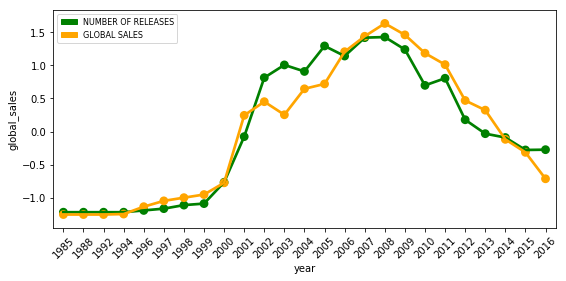

In [18]:
temp1 = vg_cleaned.groupby(['Year_of_Release']).count()
temp1 = temp1.reset_index()
temp2 = vg_cleaned.groupby(['Year_of_Release']).sum()
temp2 = temp2.reset_index()
normalised_df = pd.DataFrame()

normalised_df['release_count'] = temp1['Name']
normalised_df['global_sales'] = temp2['Global_Sales']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()
normalised_df['year'] = temp1['Year_of_Release'].astype(int)


plt.figure(figsize=(9, 4))
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.release_count, color = 'green', label='Release Count')
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.global_sales, color = 'orange', label='Global Sales')

blue_patch = mpatches.Patch(color='green', label='NUMBER OF RELEASES')
red_patch = mpatches.Patch(color='orange', label='GLOBAL SALES')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 8)

plt.xticks(rotation=45);

** Here we have comparation of the number of releases and global sales for each year. The shapes follow each other well, there wasn't too much sales with little releases or vice versa. The other thing to note is that the number of releases is smoother than the sales, which seems harder to accurately predict the sales. **

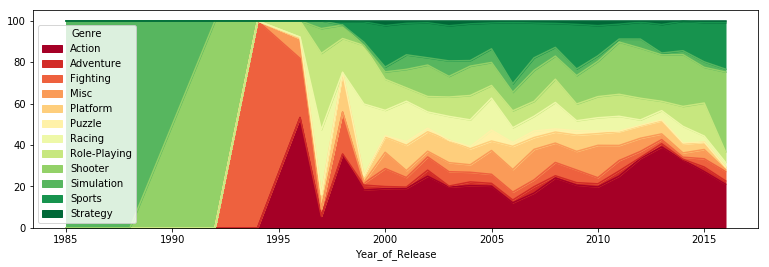

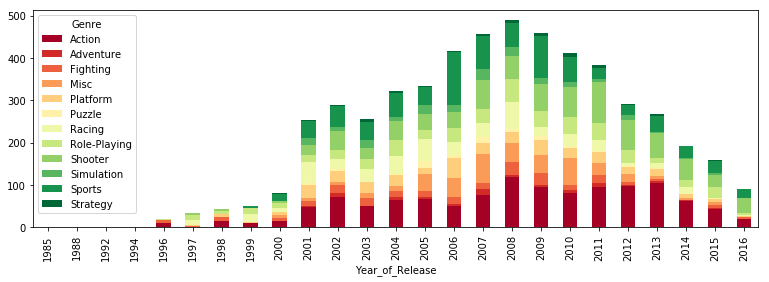

In [19]:
genre_sales_percentages_by_year = (vg_cleaned.groupby(['Year_of_Release', 'Genre']).Global_Sales.sum())*(100)/vg_cleaned.groupby(['Year_of_Release']).Global_Sales.sum()
genre_sales_percentages_by_year.unstack().plot(kind='area', stacked=True, colormap= 'RdYlGn', grid=False, figsize=(13, 4))

yearlySales = vg_cleaned.groupby(['Year_of_Release','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'RdYlGn', figsize=(13, 4) ) 

**The first graph shows the genre sales percentage by year, and the second one the actual genre sales by year. The "action" genre is clearly what gamers are interested to play the most. The interesting trend about it is that when the games sales started their decline around 2009, the "action" level remained almost the same. This genre may seem not to be as affected from the market changes as the other genres.**

### Genre Total Sales

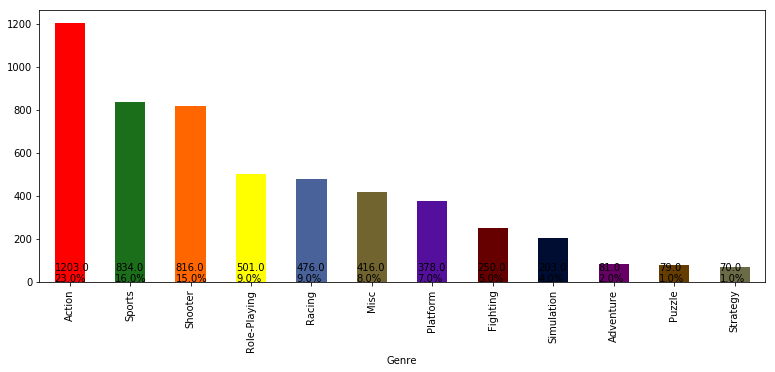

In [20]:
ordered_genres_ts = list(vg_cleaned.groupby('Genre').sum().Global_Sales.sort_values(ascending=False).keys())

x = vg_cleaned.groupby(['Genre']).sum().copy()
ax = x.Global_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5), color = [color_dict.get(x, '#333333') for x in ordered_genres_ts]);

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() / 53.23) )+ "%", 
                (p.get_x(), 0),
                color='black')

### Genre Total Number of Releases

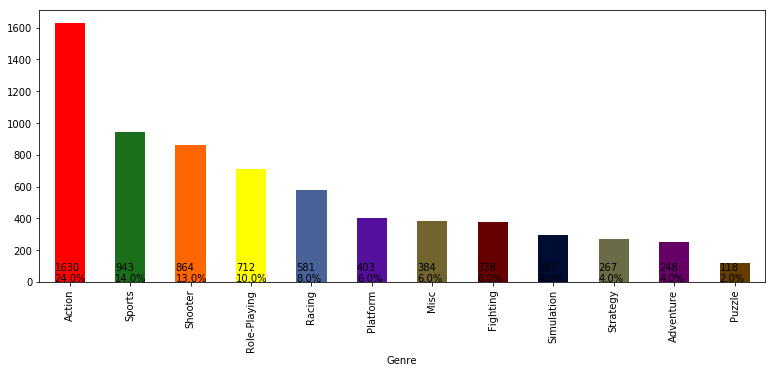

In [21]:
ordered_genres_tr = list(vg_cleaned.groupby('Genre').count().Global_Sales.sort_values(ascending=False).keys())

x1 = vg_cleaned.groupby(['Genre']).count()
ax1 = x1.Global_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5),  color = [color_dict.get(x, '#333333') for x in ordered_genres_tr])

for p in ax1.patches:
    ax1.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() / 68.53) )+ "%", 
                (p.get_x(), 0),
                color='black')

** The ranking of genres by total sales was: Action, Sports, Shooter, Role-Playing, Racing, Misc, Platform, Fighting, Simulation, Adventure, Puzzle, Strategy. **

** The ranking of genres by number of releases is: Action, Sports, Shooter, Role-Playing, Racing, Platform, Misc, Fighting, Simulation, Strategy, Adventure, Puzzle. **

** We can see that there are no drastic changes in the ranking. For example, genre Strategy is sold less than it is released. **

** These changes in ranking are interesting to explore more. We want to see how different genres perform accordingly to different metrics. The ones we chose are: **
- Number of Releases per Genre
- Total Sales per Genre
- Average Sales per Game per Genre 

In [22]:
genre_difference_metric = [vg_cleaned.Genre.value_counts().index, vg_cleaned.groupby(['Genre']).sum().Global_Sales.sort_values(ascending=False).index, vg_cleaned.groupby(['Genre']).mean().Global_Sales.sort_values(ascending=False).index]

genre_evolution_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

for metric in range(3):
    for genre in range(len(genre_difference_metric[metric])):
        genre_evolution_df = genre_evolution_df.append({'genre':genre_difference_metric[metric][genre], 'rank_type': metric, 'rank':genre},
                                   ignore_index=True)

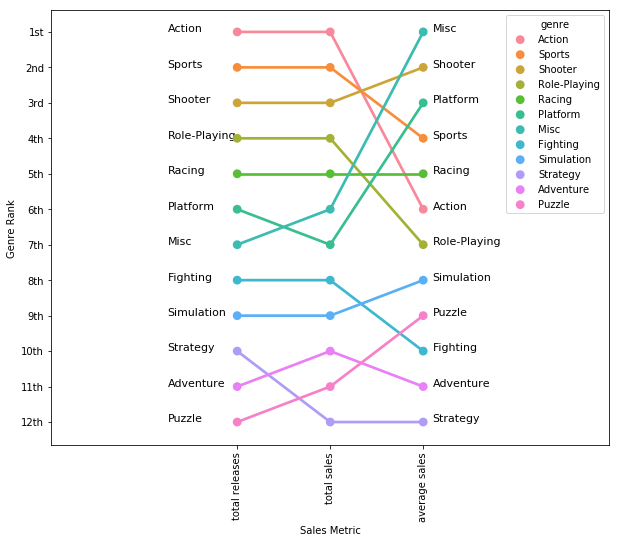

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_evolution_df.rank_type,
              y=12-genre_evolution_df['rank'], 
              hue=genre_evolution_df.genre)

for i in range(len(genre_difference_metric[0])):
    ax.text(-0.75, 12-i, genre_difference_metric[0][i], fontsize=11)
    ax.text(2.1, 12-i, genre_difference_metric[2][i], fontsize=11)
    
ax.set_xlim([-2,4])

xs = [0.0, 1.0, 2.0]
x_labels = ['total releases', 'total sales', 'average sales']
plt.xticks(xs, x_labels, rotation='vertical')

ax.set_xlabel('Sales Metric')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();


** This is visualization of the changes in the ranking of genres, according to different metrics. 
In the first column the genres are ranked by total releases, in the second by total sales and in the third by average sales. The line that connects the dots for each genre is used to show how the rank of a particular genre rises or decreases depending on the metric**

## Conclusion


#### From all this, we can have couple of interesting conslusions.
#### For example the most interesting fact that we got is that Japan has drastically diffrent market from other regions.
#### Also the action genre is the most popular from all and has not suffered from the previously stated hypotesis that the economic crisis might have made changes in the sales in 2009. 
#### It is important to notice that video games are very popular and the releases and sales do not differ much from each other on yearly basis, which is a good thing for the video games market.**

<sup>1</sup>Metacritic is a web site that collects reviews about a variety of music albums, video games, movies, series, etc. Finally, for each product, two average scores are calculated, one of the analysts in Metacritic, another from the subcribers on the site.

<sup>2</sup>ESRB(Entertainment Software Rating Board) is a non-profit organisation that assigns video games ratings and content based applications, the interctive elements it contains and the age for which it is intended.

<sup>3</sup>VG Chartz is a video game website that deals with data collections for video games, consoles and hardware.

<sup>4</sup>The attribute represents the sum of NA_Sales, EU_Sales, JP_Sales and Other_Sales. It can be removed for futher analysis or used as a summary attribute.